# EV SALES ANALYSIS


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
 
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [117]:
df=pd.read_csv("C:\\Users\\Dell\\Downloads\\IEA-EV-data.csv")
df.head(3)

region    category       parameter  mode powertrain  year     unit   
0  Australia  Historical        EV sales  Cars        BEV  2011    sales  \
1  Australia  Historical        EV stock  Cars        BEV  2011    stock   
2  Australia  Historical  EV stock share  Cars         EV  2011  percent   

      value  
0  49.00000  
1  49.00000  
2   0.00046

In [9]:
df.shape

(7434, 8)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7434 entries, 0 to 7433
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      7434 non-null   object 
 1   category    7434 non-null   object 
 2   parameter   7434 non-null   object 
 3   mode        7434 non-null   object 
 4   powertrain  7434 non-null   object 
 5   year        7434 non-null   int64  
 6   unit        7434 non-null   object 
 7   value       7434 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 464.8+ KB


In [11]:
df.nunique()

region         34
category        3
parameter       8
mode            6
powertrain      5
year           14
unit            7
value         961
dtype: int64

In [12]:
df['unit'].unique()

array(['sales', 'stock', 'percent', 'charging points',
       'Milion barrels per day', 'Milion litres gasoline equivalent',
       'GWh'], dtype=object)

In [13]:
sales=df.loc[lambda df: df['unit'] =='sales']

In [14]:
sales.head(3)

region    category parameter  mode powertrain  year   unit  value
0  Australia  Historical  EV sales  Cars        BEV  2011  sales   49.0
7  Australia  Historical  EV sales  Cars       PHEV  2012  sales   80.0
8  Australia  Historical  EV sales  Cars        BEV  2012  sales  170.0

In [15]:
df['year'].unique()

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2010, 2025, 2030], dtype=int64)

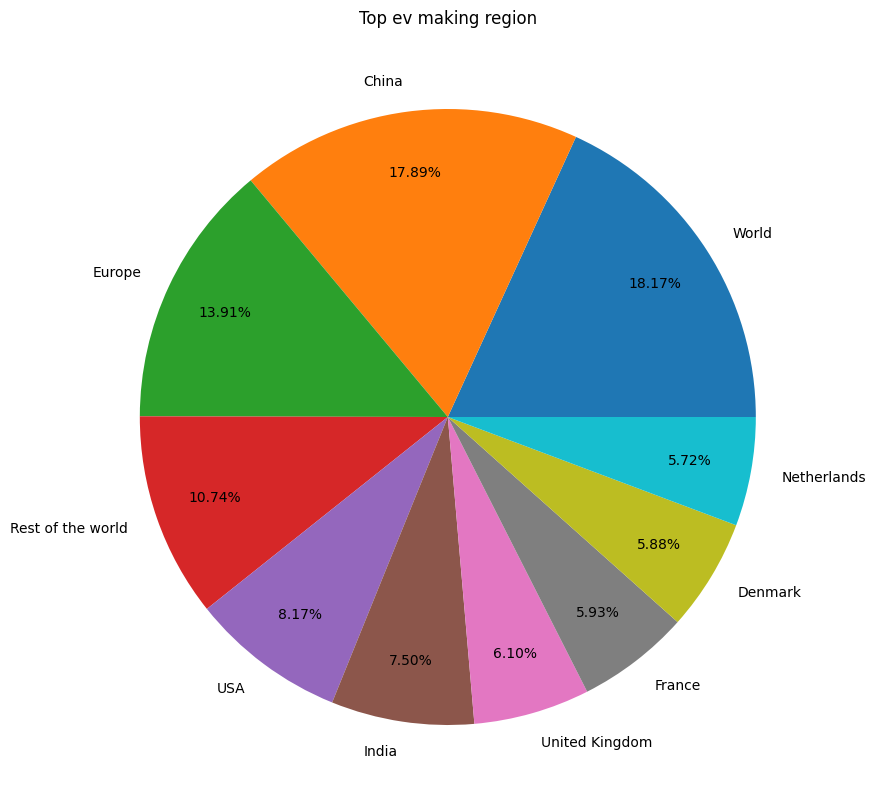

In [118]:
fig = plt.figure(figsize = (10,10))
ax = fig.subplots()
df.region.value_counts().head(10).plot(ax=ax, kind='pie',autopct='%1.2f%%', pctdistance=0.8)
ax.set_ylabel("")
ax.set_title("Top ev making region")
plt.show()

# Conclusion
China

## Exploratory Data Analisys

### Sales trend and prediction

In [17]:
sales['parameter'].unique()

array(['EV sales'], dtype=object)

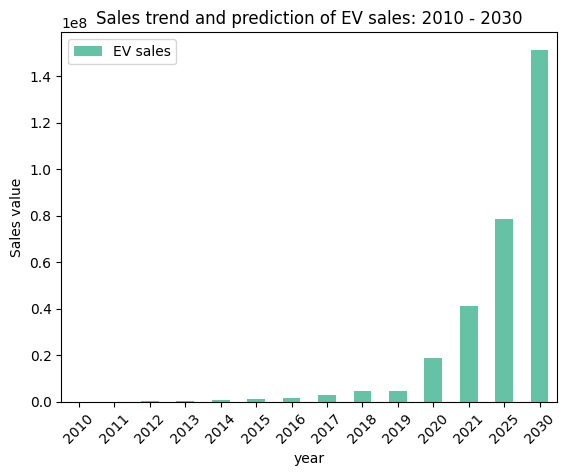

In [18]:
parameter_year=sales.groupby(['year','parameter'])['value'].sum()
parameter_year.to_csv('parameter_year.csv')
parameter_year=pd.read_csv('parameter_year.csv')
parameter_year=parameter_year.pivot_table(parameter_year,index=['year'],columns=['parameter'],fill_value=0,aggfunc=np.sum)
parameter_year.plot(kind='bar',stacked=True,cmap='Set2')
plt.legend(['EV sales'])
plt.xticks(rotation=45)
plt.ylabel('Sales value')
plt.title('Sales trend and prediction of EV sales: 2010 - 2030')
plt.show()

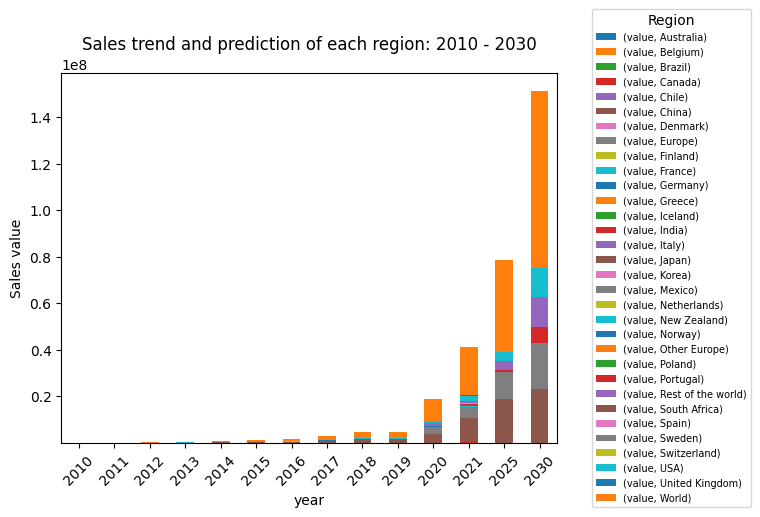

In [19]:
region_year=sales.groupby(['year','region'])['value'].sum()
region_year.to_csv('region_year.csv')
region_year=pd.read_csv('region_year.csv')
region_year=region_year.pivot_table(region_year,index=['year'],columns=['region'],fill_value=0,aggfunc=np.sum)
ax=region_year.plot(kind='bar',stacked=True)
sns.move_legend(ax,loc='center right',bbox_to_anchor=(1.4,0.5),title='Region',fontsize=7)
plt.xticks(rotation=45)
plt.ylabel('Sales value')
plt.title('Sales trend and prediction of each region: 2010 - 2030')
plt.show()

In [20]:
sales['category'].unique()

array(['Historical', 'Projection-STEPS', 'Projection-APS'], dtype=object)

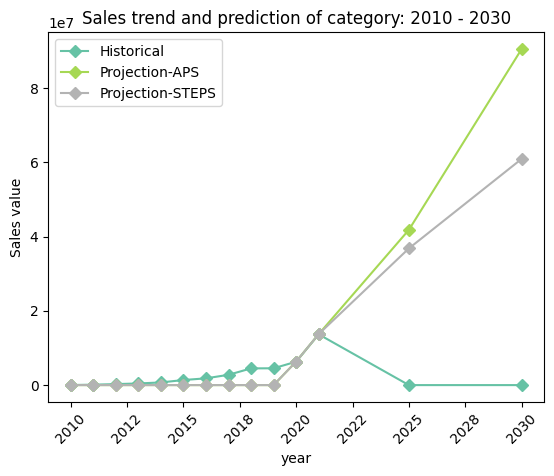

In [21]:
category_year=sales.groupby(['year','category'])['value'].sum()
category_year.to_csv('category_year.csv')
category_year=pd.read_csv('category_year.csv')
category_year=category_year.pivot_table(category_year,index=['year'],columns=['category'],fill_value=0,aggfunc=np.sum)
ax1=category_year.plot(kind='line',cmap='Set2',marker='D')
ax1.xaxis.set_major_formatter(plt.FormatStrFormatter('%.0f'))
plt.legend(['Historical','Projection-APS','Projection-STEPS'])
plt.xticks(rotation=45)
plt.ylabel('Sales value')
plt.title('Sales trend and prediction of category: 2010 - 2030')
plt.show()

In [22]:
sales['mode'].unique()

array(['Cars', 'Vans', 'Trucks', 'Buses'], dtype=object)

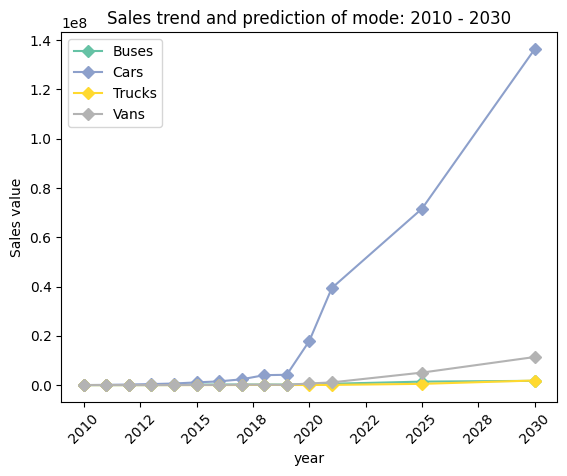

In [23]:
mode_year=sales.groupby(['year','mode'])['value'].sum()
mode_year.to_csv('mode_year.csv')
mode_year=pd.read_csv('mode_year.csv')
mode_year=mode_year.pivot_table(mode_year,index=['year'],columns=['mode'],fill_value=0,aggfunc=np.sum)
ax2=mode_year.plot(kind='line',cmap='Set2',marker='D')
ax2.xaxis.set_major_formatter(plt.FormatStrFormatter('%.0f'))
plt.legend(['Buses','Cars','Trucks','Vans'])
plt.xticks(rotation=45)
plt.ylabel('Sales value')
plt.title('Sales trend and prediction of mode: 2010 - 2030')
plt.show()

In [24]:
sales['powertrain'].unique()

array(['BEV', 'PHEV'], dtype=object)

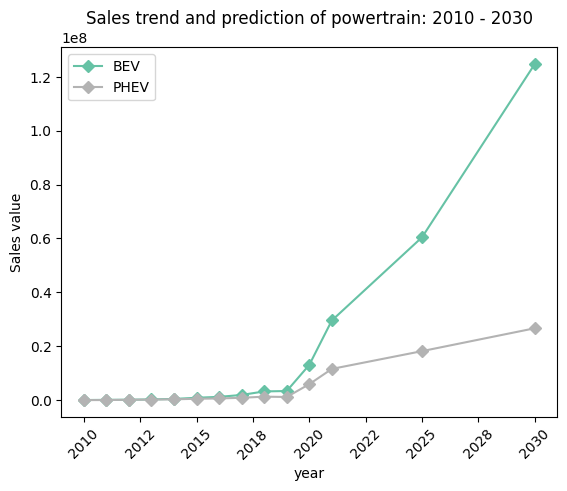

In [25]:
powertrain_year=sales.groupby(['year','powertrain'])['value'].sum()
powertrain_year.to_csv('powertrain_year.csv')
powertrain_year=pd.read_csv('powertrain_year.csv')
powertrain_year=powertrain_year.pivot_table(powertrain_year,index=['year'],columns=['powertrain'],fill_value=0,aggfunc=np.sum)
ax3=powertrain_year.plot(kind='line',cmap='Set2',marker='D')
ax3.xaxis.set_major_formatter(plt.FormatStrFormatter('%.0f'))
plt.legend(['BEV', 'PHEV'])
plt.xticks(rotation=45)
plt.ylabel('Sales value')
plt.title('Sales trend and prediction of powertrain: 2010 - 2030')
plt.show()

### Stock trend and prediction

In [26]:
stock=df.loc[lambda df: df['unit'] =='stock']

In [27]:
stock.head()

region    category parameter  mode powertrain  year   unit  value
1   Australia  Historical  EV stock  Cars        BEV  2011  stock   49.0
6   Australia  Historical  EV stock  Cars        BEV  2012  stock  220.0
9   Australia  Historical  EV stock  Cars       PHEV  2012  stock   80.0
10  Australia  Historical  EV stock  Cars       PHEV  2013  stock  180.0
13  Australia  Historical  EV stock  Cars        BEV  2013  stock  410.0

In [28]:
stock.nunique()

region         32
category        3
parameter       1
mode            4
powertrain      2
year           14
unit            1
value         452
dtype: int64

<Figure size 500x300 with 0 Axes>

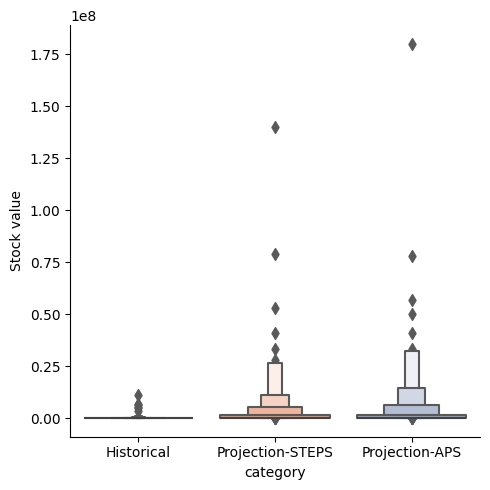

In [29]:
plt.figure(figsize=(10,6),dpi=50)
sns.catplot(x='category',y='value',data=stock,kind='boxen',palette='Set2')
plt.ylabel('Stock value')
plt.tight_layout()
plt.show()

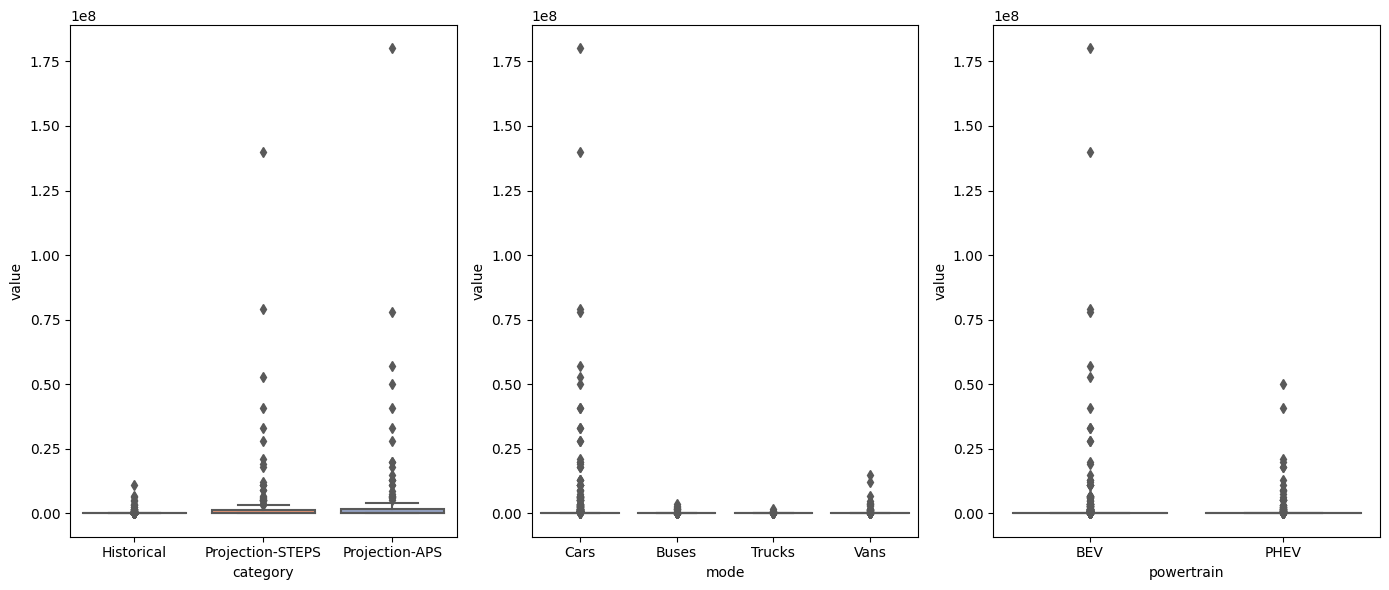

In [30]:
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(14,6))

sns.boxplot(ax=axes[0],x='category',y='value',data=stock,palette='Set2')
sns.boxplot(ax=axes[1],x='mode',y='value',data=stock,palette='Set2')
sns.boxplot(ax=axes[2],x='powertrain',y='value',data=stock,palette='Set2')

plt.tight_layout()
plt.show()

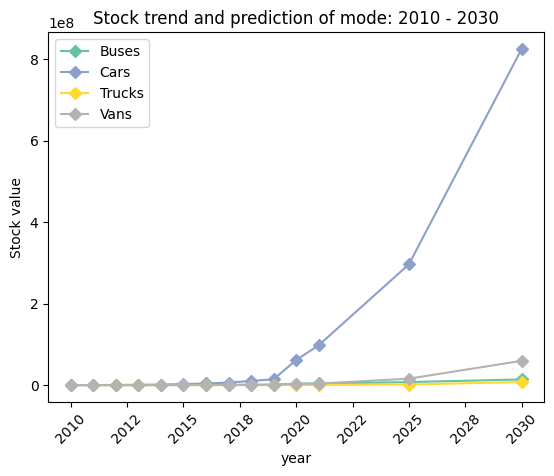

In [31]:
stock_mode_year=stock.groupby(['year','mode'])['value'].sum()
stock_mode_year.to_csv('stock_mode_year.csv')
stock_mode_year=pd.read_csv('stock_mode_year.csv')

stock_mode_year=stock_mode_year.pivot_table(stock_mode_year,index=['year'],columns=['mode'],fill_value=0,aggfunc=np.sum)
ax4=stock_mode_year.plot(kind='line',cmap='Set2',marker='D')
ax4.xaxis.set_major_formatter(plt.FormatStrFormatter('%.0f'))
plt.legend(['Buses','Cars','Trucks','Vans'])
plt.xticks(rotation=45)
plt.ylabel('Stock value')
plt.title('Stock trend and prediction of mode: 2010 - 2030')
plt.show()

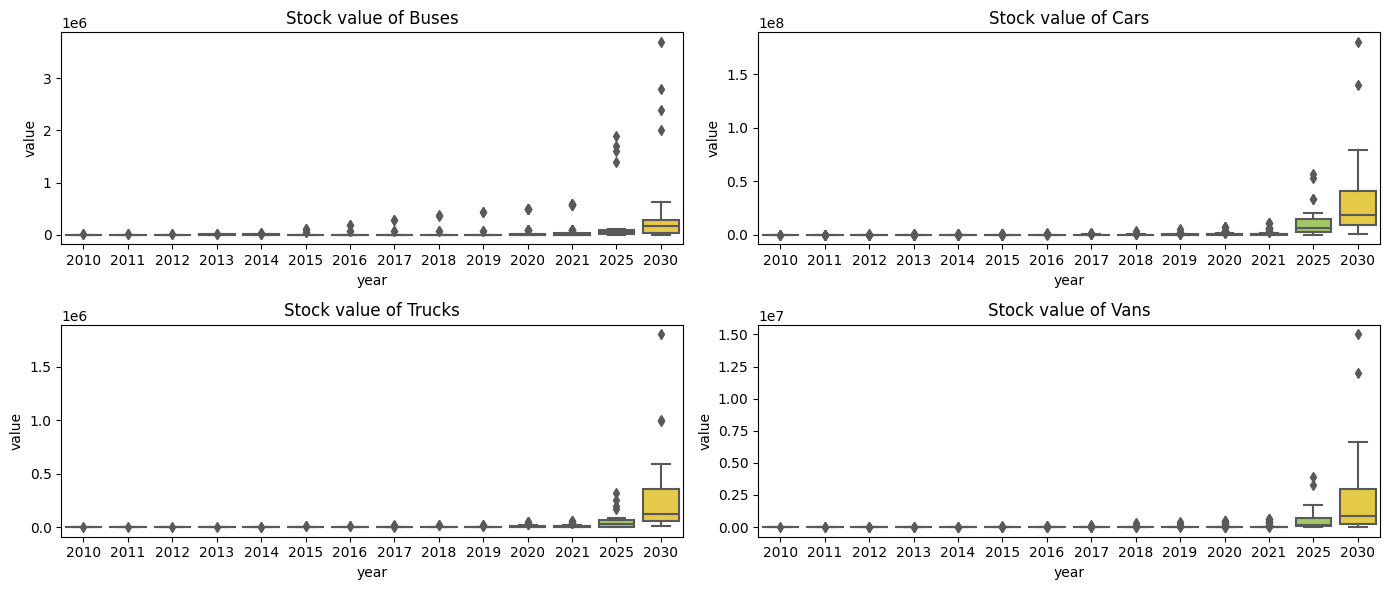

In [32]:
stock_mode_year=stock[['year','mode','value']]

buses=stock_mode_year.loc[stock_mode_year['mode']=='Buses']
cars=stock_mode_year.loc[stock_mode_year['mode']=='Cars']
trucks=stock_mode_year.loc[stock_mode_year['mode']=='Trucks']
vans=stock_mode_year.loc[stock_mode_year['mode']=='Vans']

fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(14,6))

sns.boxplot(ax=axes[0,0],x='year',y='value',data=buses,palette='Set2')
axes[0,0].set_title('Stock value of Buses')
sns.boxplot(ax=axes[0,1],x='year',y='value',data=cars,palette='Set2')
axes[0,1].set_title('Stock value of Cars')
sns.boxplot(ax=axes[1,0],x='year',y='value',data=trucks,palette='Set2')
axes[1,0].set_title('Stock value of Trucks')
sns.boxplot(ax=axes[1,1],x='year',y='value',data=vans,palette='Set2')
axes[1,1].set_title('Stock value of Vans')

# plt.xticks(fontsize=3)
plt.tight_layout()
plt.show()

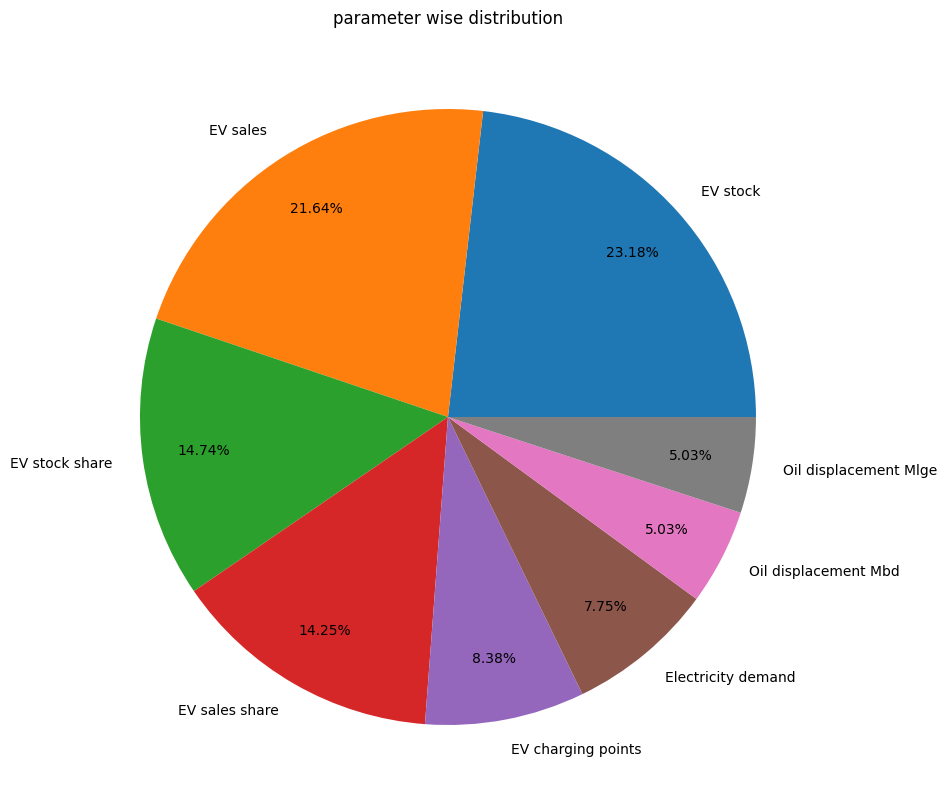

In [119]:
fig = plt.figure(figsize = (10,10))
ax = fig.subplots()
df.parameter.value_counts().plot(ax=ax, kind='pie',autopct='%1.2f%%', pctdistance=0.8)
ax.set_ylabel("")
ax.set_title("parameter wise distribution")
plt.show()

<Axes: ylabel='Frequency'>

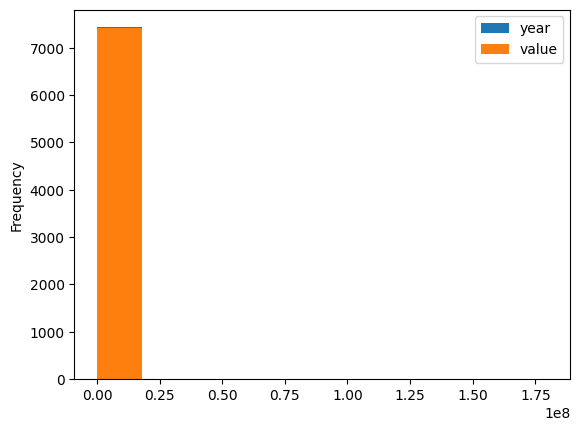

In [81]:
df.plot.hist()

<Axes: xlabel='region', ylabel='parameter'>

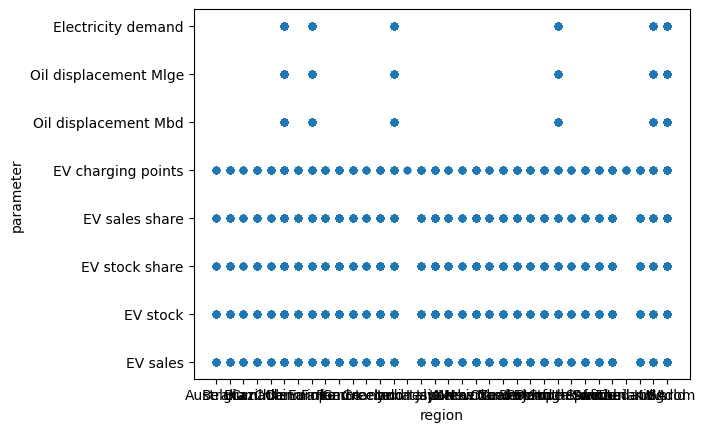

In [35]:
df.plot.scatter(y='parameter',x='region')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Cars'),
  Text(1, 0, 'EV'),
  Text(2, 0, 'Buses'),
  Text(3, 0, 'Trucks'),
  Text(4, 0, 'Vans'),
  Text(5, 0, 'SSPACEHHP')])

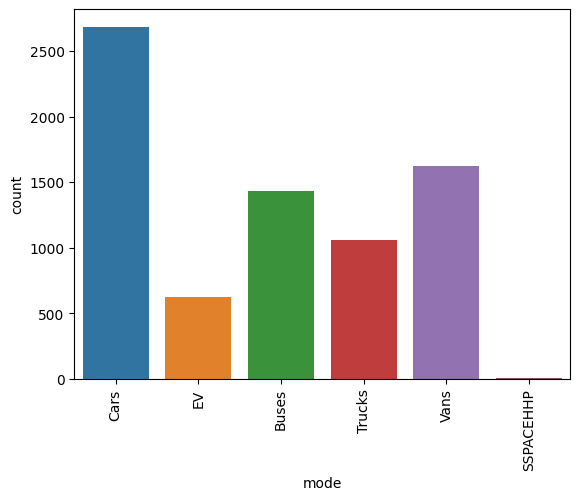

In [36]:
sns.countplot(x='mode',data=df)
plt.xticks(rotation='vertical')

# EV MODEL ANALYSIS
This analysis is basically from another dataset analysis from kaggle

In [120]:
df = pd.read_csv("C:\\Users\\Dell\\Downloads\\ElectricCarData_Clean.csv")

In [38]:
df

Brand                            Model  AccelSec  TopSpeed_KmH   
0         Tesla     Model 3 Long Range Dual Motor       4.6           233  \
1    Volkswagen                         ID.3 Pure      10.0           160   
2      Polestar                                 2       4.7           210   
3           BMW                              iX3        6.8           180   
4         Honda                                e        9.5           145   
..           ...                              ...       ...           ...   
98       Nissan                       Ariya 63kWh       7.5           160   
99         Audi     e-tron S Sportback 55 quattro       4.5           210   
100      Nissan               Ariya e-4ORCE 63kWh       5.9           200   
101      Nissan   Ariya e-4ORCE 87kWh Performance       5.1           200   
102       Byton                 M-Byte 95 kWh 2WD       7.5           190   

     Range_Km  Efficiency_WhKm FastCharge_KmH RapidCharge PowerTrain   
0         450              161            940         Yes        AWD  \
1         270              167            250         Yes        RWD   
2         400              181            620         Yes        AWD   
3         360              206            560         Yes        RWD   
4         170              168            190         Yes        RWD   
..        ...              ...            ...         ...        ...   
98        330              191            440         Yes        FWD   
99        335              258            540         Yes        AWD   
100       325              194            440         Yes        AWD   
101       375              232            450         Yes        AWD   
102       400              238            480         Yes        AWD   

       PlugType  BodyStyle Segment  Seats  PriceEuro  
0    Type 2 CCS      Sedan       D      5      55480  
1    Type 2 CCS  Hatchback       C      5      30000  
2    Type 2 CCS   Liftback       D      5      56440  
3    Type 2 CCS        SUV       D      5      68040  
4    Type 2 CCS  Hatchback       B      4      32997  
..          ...        ...     ...    ...        ...  
98   Type 2 CCS  Hatchback       C      5      45000  
99   Type 2 CCS        SUV       E      5      96050  
100  Type 2 CCS  Hatchback       C      5      50000  
101  Type 2 CCS  Hatchback       C      5      65000  
102  Type 2 CCS        SUV       E      5      62000  

[103 rows x 14 columns]

In [39]:
df.isnull().sum()


Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

In [40]:
df.columns


Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

In [41]:
df['FullName'] = df['Brand'] + '-' + df['Model']
df_1 = df.loc[df['PriceEuro'] <= 50000]
df_2 = df.loc[df['PriceEuro'] > 50000]
t1 = 'Less than 50,000 Euros' 
t2 = 'More than 50,000 Euros'


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


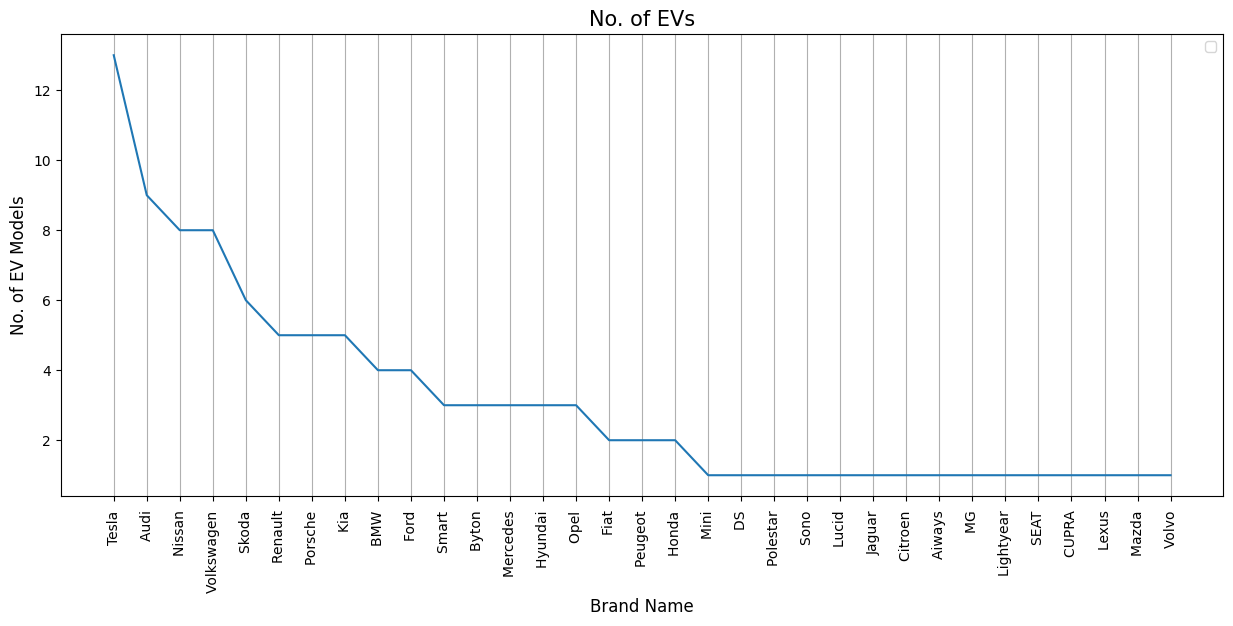

In [42]:
# Total number of models from respected brand
plt.figure(figsize=(15,6))
plt.xticks(rotation = 90)
plt.grid(axis="x")
plt.legend()
plt.xlabel("Brand Name",fontsize=12)
plt.ylabel("No. of EV Models",fontsize=12)
plt.title('No. of EVs',fontsize=15)
plt.plot(df['Brand'].value_counts(), label='No. of Models')
plt.show()


In [43]:
def power_train(dataframe): 
    sns.countplot(x= dataframe['PowerTrain'])
    plt.title('Count Plot of Powertrain', fontsize = 20)
    plt.xlabel('Power Train', fontsize = 15)
    plt.ylabel('Count', fontsize = 15)


In [44]:
def bodystyle(dataframe):
    plt.figure(figsize=(10, 5))
    sns.countplot(x= 'BodyStyle', data= dataframe, hue='PowerTrain')
    plt.title('Count plot of Body Style', fontsize= 20)
    plt.xlabel('Body Style', fontsize= 15)
    plt.ylabel('Count', fontsize= 15)
    plt.show()


Function to plot range of vehicles


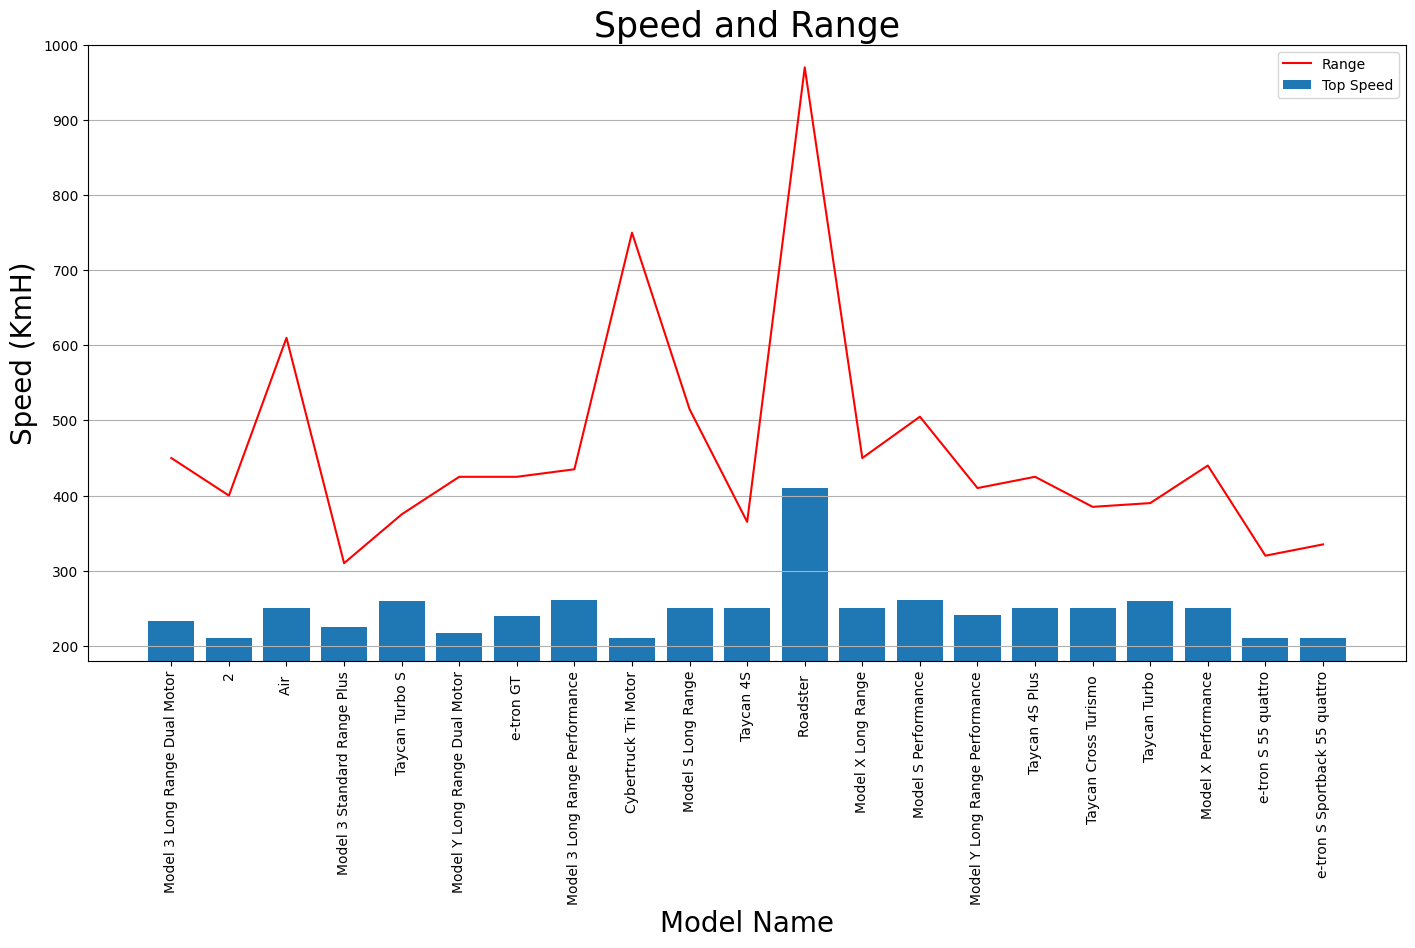

In [45]:
# Top Speed and Range filtration
df2 = df[df['TopSpeed_KmH']>200] # speed more than 200KmH

plt.figure(figsize=(17,8))
plt.title("Speed and Range",fontsize=25)
plt.grid(axis='y')
plt.ylim(bottom=180,top=1000)
plt.xticks(rotation = 90)
plt.xlabel("Model Name",fontsize=20)
plt.ylabel("Speed (KmH)",fontsize=20)
plt.bar(df2['Model'],df2['TopSpeed_KmH'],label='Top Speed') # Bar graph showing Top Speed
plt.plot(df2['Model'],df2['Range_Km'],label='Range',c='r') # Line graph showing Range of vehicle
plt.legend()


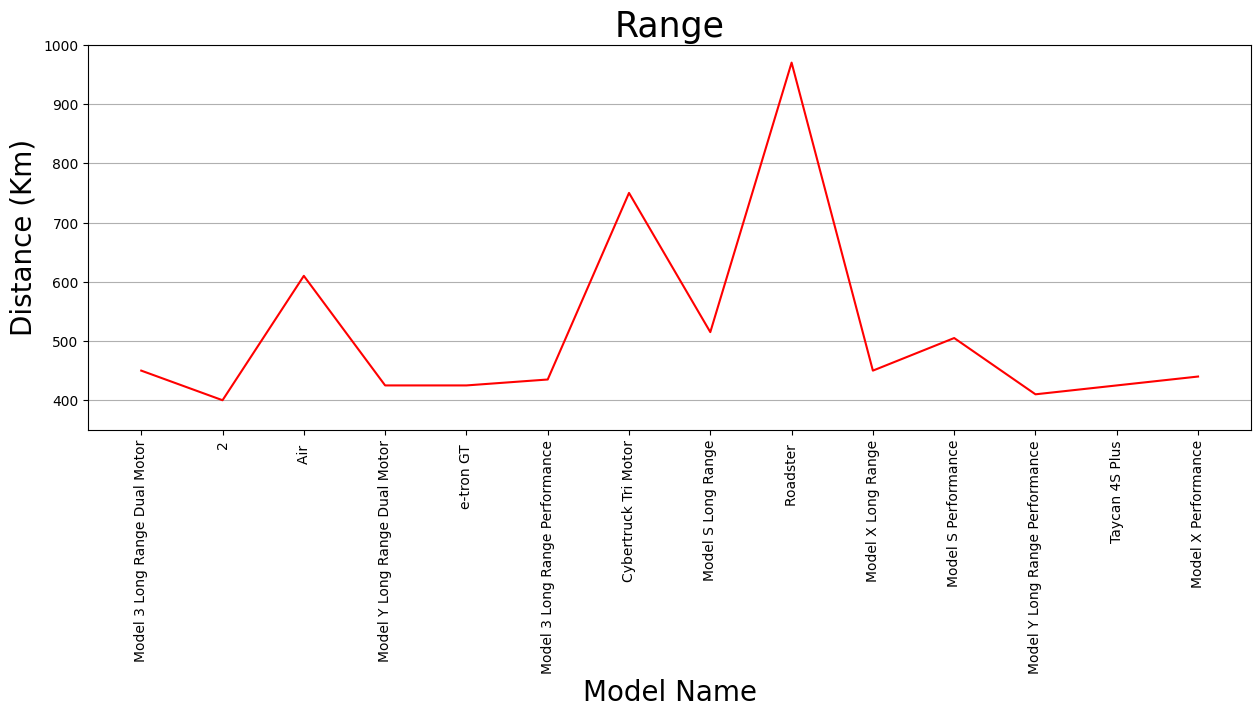

In [46]:
# Filteration of models related to Range
df3 = df2[df2['Range_Km']>=400] # Range above 400 km

plt.figure(figsize=(15,5))
plt.title("Range",fontsize=25)
plt.grid(axis='y')
plt.ylim(bottom=350,top=1000)
plt.xticks(rotation = 90)
plt.xlabel("Model Name",fontsize=20)
plt.ylabel("Distance (Km)",fontsize=20)
plt.plot(df3['Model'],df3['Range_Km'],label='Range',c='r')


Model Performance

In [47]:
px.bar(df,x='Brand',y = 'TopSpeed_KmH',color = 'Brand',title = 'Which Car Has a Top speed?',labels = {'x':'Car Brands','y':'Top Speed Km/H'})


# Conclusion
Tesla

In [48]:
px.bar(df,x='AccelSec',y = 'Brand',color = 'Brand',title = 'Which car has fastest accelaration?',labels = {'x':'Accelaration','y':'Car Brands'})


# Conclusion
Volkswagen

Price Analysis

<Axes: title={'center': 'Car Price'}, xlabel='No. of Samples', ylabel='Car Price'>

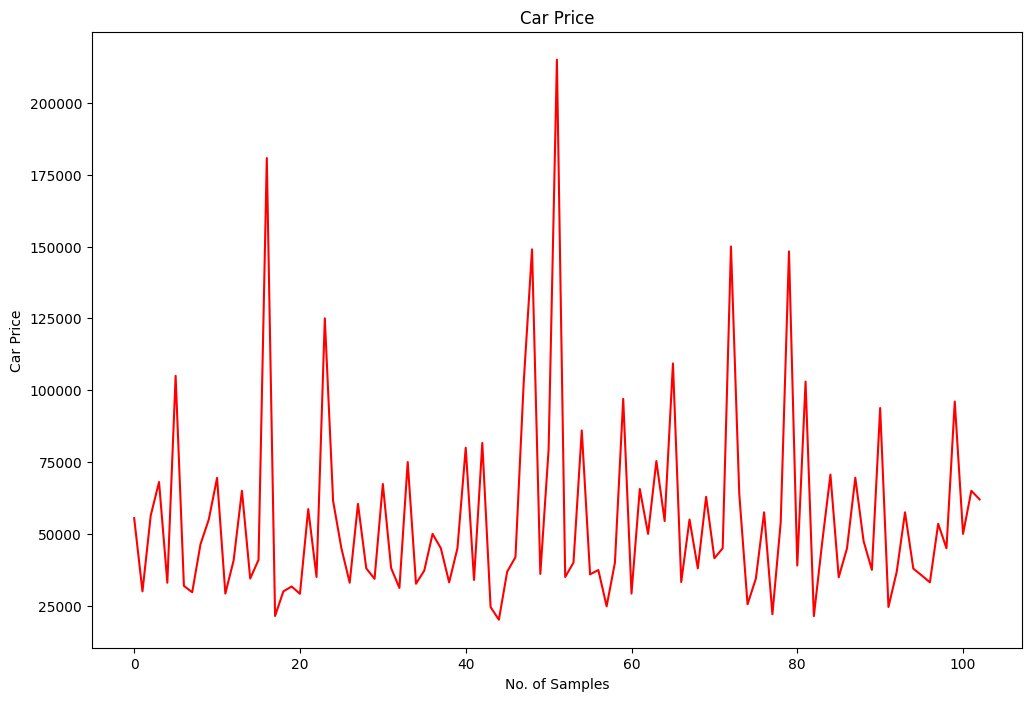

In [49]:
df['PriceEuro'].plot(figsize = (12,8),title='Car Price',xlabel = 'No. of Samples',ylabel = 'Car Price',color = 'red')


In [50]:
px.bar(df,x = 'Range_Km',y = 'PowerTrain',color = 'PowerTrain',text='PowerTrain')


In [123]:
px.pie(df,names = 'Brand',values = 'PriceEuro')


#Conclusion
Tesla

Text(0.5, 1.0, 'Plug Type')

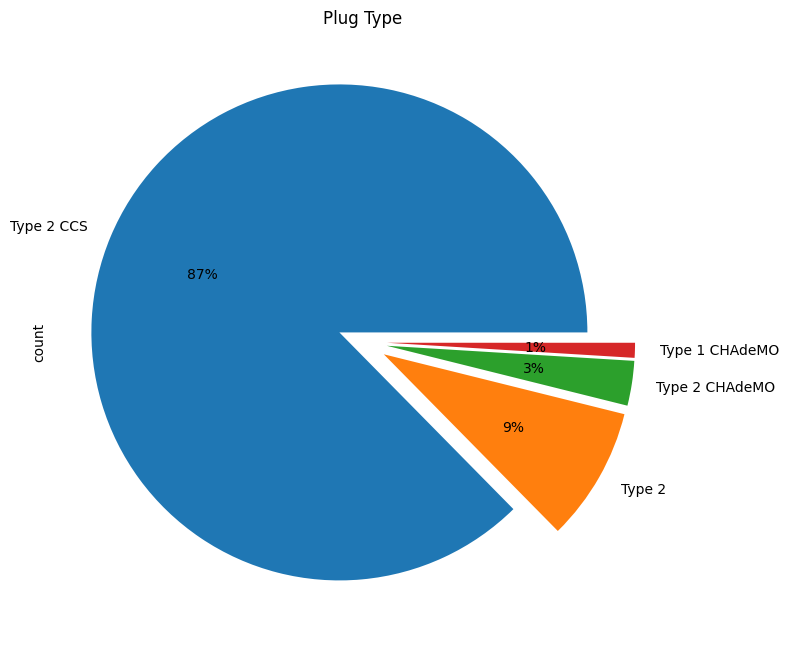

In [52]:
df['PlugType'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(.1,.1,.1,.1))
plt.title('Plug Type')


#Type 2CCS is mostly used

# EV SALES ANALYSIS OF USA

In [127]:
df = pd.read_csv("C:\\Users\\Dell\\Downloads\\Electric Car Sales by Model in USA.csv")

In [92]:
df

Make               Model   
0    Chevrolet                Volt  \
1       Toyota           Prius PHV   
2       Nissan                Leaf   
3        Tesla             Model S   
4         Ford        C-Max Energi   
5         Ford      Focus Electric   
6   Mitsubishi              i-MiEV   
7       Toyota             Rav4 EV   
8        Honda              Fit EV   
9         Ford       Fusion Energi   
10        Fiat                500e   
11       Smart                  ED   
12   Chevrolet            Spark EV   
13       Honda          Accord PHV   
14     Porsche   Panamera E-Hybrid   
15    Cadillac                 ELR   
16         BMW                  i3   
17    Mercedes          B-Class ED   
18         BMW                  i8   
19         Kia             Soul EV   
20          VW              e-Golf   
21     Porsche         Cayenne S-E   
22         BMW        X5 xDrive40e   
23       Tesla             Model X   
24     Porsche          918 Spyder   
25     Hyundai         Sonata PHEV   
26    Mercedes               S550e   
27       Volvo                XC90   
28        Audi    A3 Sprtbk e-tron   
29       Other               Other   
30      Toyota         Prius Prime   
31         BMW                330e   
32   Chevrolet             Bolt EV   
33    Mercedes            GLE 550e   
34    Mercedes               C350e   
35         BMW                740e   
36    Chrysler     Pacifica Hybrid   
37         BMW                530e   
38       Tesla             Model 3   
39         Kia         Optima PHEV   
40       Honda         Clarity BEV   
41       Honda        Clarity PHEV   
42       Volvo           XC60 PHEV   
43        Mini  Countryman SE PHEV   
44     Hyundai            IONIQ EV   
45    Cadillac            CT6 PHEV   
46       Volvo         S90 T8 PHEV   
47  Mitsubishi      Outlander PHEV   
48         Kia           Niro PHEV   
49    Mercedes            GLC 350e   
50      Jaguar              I-Pace   
51     Hyundai          IONIQ PHEV   
52     Hyundai       Kona Electric   
53        Audi              e-tron   
54      Subaru    Crosstrek Hybrid   
55         Kia             Niro EV   
56     Porsche              Taycan   

                                                 Logo  janv-12  Feb 2012   
0   https://www.carlogos.org/logo/Chevrolet-logo-2...    603.0    1626.0  \
1   https://www.carlogos.org/logo/Toyota-logo-1989...      0.0      21.0   
2   https://www.carlogos.org/logo/Nissan-logo-2013...    676.0    1154.0   
3   https://www.carlogos.org/logo/Tesla-logo-2003-...      0.0       NaN   
4   https://www.carlogos.org/logo/Ford-logo-2003-1...      0.0       NaN   
5   https://www.carlogos.org/logo/Ford-logo-2003-1...      2.0       2.0   
6   https://www.carlogos.org/logo/Mitsubishi-logo-...     36.0      80.0   
7   https://www.carlogos.org/logo/Toyota-logo-1989...      0.0       NaN   
8   https://www.carlogos.org/logo/Honda-logo-1920x...      0.0       NaN   
9   https://www.carlogos.org/logo/Ford-logo-2003-1...      0.0       NaN   
10  https://www.carlogos.org/logo/Fiat-logo-2006-1...      0.0       NaN   
11  https://www.carlogos.org/logo/Smart-logo-1994-...      0.0       NaN   
12  https://www.carlogos.org/logo/Chevrolet-logo-2...      NaN       NaN   
13  https://www.carlogos.org/logo/Honda-logo-1920x...      NaN       NaN   
14  https://www.carlogos.org/logo/Porsche-logo-200...      NaN       NaN   
15  https://www.carlogos.org/logo/Cadillac-logo-20...      NaN       NaN   
16  https://www.carlogos.org/logo/BMW-logo-2000-20...      NaN       NaN   
17  https://www.carlogos.org/logo/Mercedes-Benz-lo...      NaN       NaN   
18  https://www.carlogos.org/logo/BMW-logo-2000-20...      NaN       NaN   
19  https://www.carlogos.org/logo/Kia-logo-2560x14...      NaN       NaN   
20  https://www.carlogos.org/logo/Volkswagen-logo-...      NaN       NaN   
21  https://www.carlogos.org/logo/Porsche-logo-200...      NaN       NaN   
22  https://www.carlogos.org/logo/BMW-logo-2000-20...    

In [55]:
df.shape

(57, 99)

In [93]:
df.head

<bound method NDFrame.head of           Make               Model   
0    Chevrolet                Volt  \
1       Toyota           Prius PHV   
2       Nissan                Leaf   
3        Tesla             Model S   
4         Ford        C-Max Energi   
5         Ford      Focus Electric   
6   Mitsubishi              i-MiEV   
7       Toyota             Rav4 EV   
8        Honda              Fit EV   
9         Ford       Fusion Energi   
10        Fiat                500e   
11       Smart                  ED   
12   Chevrolet            Spark EV   
13       Honda          Accord PHV   
14     Porsche   Panamera E-Hybrid   
15    Cadillac                 ELR   
16         BMW                  i3   
17    Mercedes          B-Class ED   
18         BMW                  i8   
19         Kia             Soul EV   
20          VW              e-Golf   
21     Porsche         Cayenne S-E   
22         BMW        X5 xDrive40e   
23       Tesla             Model X   
24     Porsche      

In [58]:
df.info

<bound method DataFrame.info of           Make               Model   
0    Chevrolet                Volt  \
1       Toyota           Prius PHV   
2       Nissan                Leaf   
3        Tesla             Model S   
4         Ford        C-Max Energi   
5         Ford      Focus Electric   
6   Mitsubishi              i-MiEV   
7       Toyota             Rav4 EV   
8        Honda              Fit EV   
9         Ford       Fusion Energi   
10        Fiat                500e   
11       Smart                  ED   
12   Chevrolet            Spark EV   
13       Honda          Accord PHV   
14     Porsche   Panamera E-Hybrid   
15    Cadillac                 ELR   
16         BMW                  i3   
17    Mercedes          B-Class ED   
18         BMW                  i8   
19         Kia             Soul EV   
20          VW              e-Golf   
21     Porsche         Cayenne S-E   
22         BMW        X5 xDrive40e   
23       Tesla             Model X   
24     Porsche    

In [59]:
df.describe

<bound method NDFrame.describe of           Make               Model   
0    Chevrolet                Volt  \
1       Toyota           Prius PHV   
2       Nissan                Leaf   
3        Tesla             Model S   
4         Ford        C-Max Energi   
5         Ford      Focus Electric   
6   Mitsubishi              i-MiEV   
7       Toyota             Rav4 EV   
8        Honda              Fit EV   
9         Ford       Fusion Energi   
10        Fiat                500e   
11       Smart                  ED   
12   Chevrolet            Spark EV   
13       Honda          Accord PHV   
14     Porsche   Panamera E-Hybrid   
15    Cadillac                 ELR   
16         BMW                  i3   
17    Mercedes          B-Class ED   
18         BMW                  i8   
19         Kia             Soul EV   
20          VW              e-Golf   
21     Porsche         Cayenne S-E   
22         BMW        X5 xDrive40e   
23       Tesla             Model X   
24     Porsche  

In [60]:
df.nunique()

Make        23
Model       57
Logo        22
janv-12      5
Feb 2012     5
            ..
Aug 2019    56
sept-19     56
oct-19      56
nov-19      56
Dec 2019    57
Length: 99, dtype: int64

In [63]:
df['Model'].unique()

array(['Volt', 'Prius PHV', 'Leaf', 'Model S', 'C-Max Energi',
       'Focus Electric', 'i-MiEV', 'Rav4 EV', 'Fit EV', 'Fusion Energi',
       '500e', 'ED', 'Spark EV', 'Accord PHV', 'Panamera E-Hybrid', 'ELR',
       'i3', 'B-Class ED', 'i8', 'Soul EV', 'e-Golf', 'Cayenne S-E',
       'X5 xDrive40e', 'Model X', '918 Spyder', 'Sonata PHEV', 'S550e',
       'XC90', 'A3 Sprtbk e-tron', 'Other', 'Prius Prime', '330e',
       'Bolt EV', 'GLE 550e', 'C350e', '740e', 'Pacifica Hybrid', '530e',
       'Model 3', 'Optima PHEV', 'Clarity BEV', 'Clarity PHEV',
       'XC60 PHEV', 'Countryman SE PHEV', 'IONIQ EV', 'CT6 PHEV',
       'S90 T8 PHEV', 'Outlander PHEV', 'Niro PHEV', 'GLC 350e', 'I-Pace',
       'IONIQ PHEV', 'Kona Electric', 'e-tron', 'Crosstrek Hybrid',
       'Niro EV', 'Taycan'], dtype=object)

In [66]:
sales=df.loc[lambda df: df['Make'] =='sales']

In [67]:
sales.head(3)

Empty DataFrame
Columns: [Make, Model, Logo, janv-12, Feb 2012, mars-12, Apr 2012, May 2012, juin-12, juil-12, Aug 2012, sept-12, oct-12, nov-12, Dec 2012, janv-13, Feb 2013, mars-13, Apr 2013, May 2013, juin-13, juil-13, Aug 2013, sept-13, oct-13, nov-13, Dec 2013, janv-14, Feb 2014, mars-14, Apr 2014, May 2014, juin-14, juil-14, Aug 2014, sept-14, oct-14, nov-14, Dec 2014, janv-15, Feb 2015, mars-15, Apr 2015, May 2015, juin-15, juil-15, Aug 2015, sept-15, oct-15, nov-15, Dec 2015, janv-16, Feb 2016, mars-16, Apr 2016, May 2016, juin-16, juil-16, Aug 2016, sept-16, oct-16, nov-16, Dec 2016, janv-17, Feb 2017, mars-17, Apr 2017, May 2017, juin-17, juil-17, Aug 2017, sept-17, oct-17, nov-17, Dec 2017, janv-18, Feb 2018, mars-18, Apr 2018, May 2018, juin-18, juil-18, Aug 2018, sept-18, oct-18, nov-18, Dec 2018, janv-19, Feb 2019, mars-19, Apr 2019, May 2019, juin-19, juil-19, Aug 2019, sept-19, oct-19, nov-19, Dec 2019]
Index: []

[0 rows x 99 columns]

In [69]:
df['Logo'].unique()

array(['https://www.carlogos.org/logo/Chevrolet-logo-2013-2560x1440.png',
       'https://www.carlogos.org/logo/Toyota-logo-1989-2560x1440.png',
       'https://www.carlogos.org/logo/Nissan-logo-2013-1440x900.png',
       'https://www.carlogos.org/logo/Tesla-logo-2003-2500x2500.png',
       'https://www.carlogos.org/logo/Ford-logo-2003-1366x768.png',
       'https://www.carlogos.org/logo/Mitsubishi-logo-2000x2500.png',
       'https://www.carlogos.org/logo/Honda-logo-1920x1080.png',
       'https://www.carlogos.org/logo/Fiat-logo-2006-1920x1080.png',
       'https://www.carlogos.org/logo/Smart-logo-1994-1366x768.png',
       'https://www.carlogos.org/logo/Porsche-logo-2008-1920x1080.png',
       'https://www.carlogos.org/logo/Cadillac-logo-2014-1920x1080.png',
       'https://www.carlogos.org/logo/BMW-logo-2000-2048x2048.png',
       'https://www.carlogos.org/logo/Mercedes-Benz-logo-2011-1920x1080.png',
       'https://www.carlogos.org/logo/Kia-logo-2560x1440.png',
       'https://www.

In [70]:
df['Make'].unique()

array(['Chevrolet', 'Toyota', 'Nissan', 'Tesla', 'Ford', 'Mitsubishi',
       'Honda', 'Fiat', 'Smart', 'Porsche', 'Cadillac', 'BMW', 'Mercedes',
       'Kia', 'VW', 'Hyundai', 'Volvo', 'Audi', 'Other', 'Chrysler',
       'Mini', 'Jaguar', 'Subaru'], dtype=object)

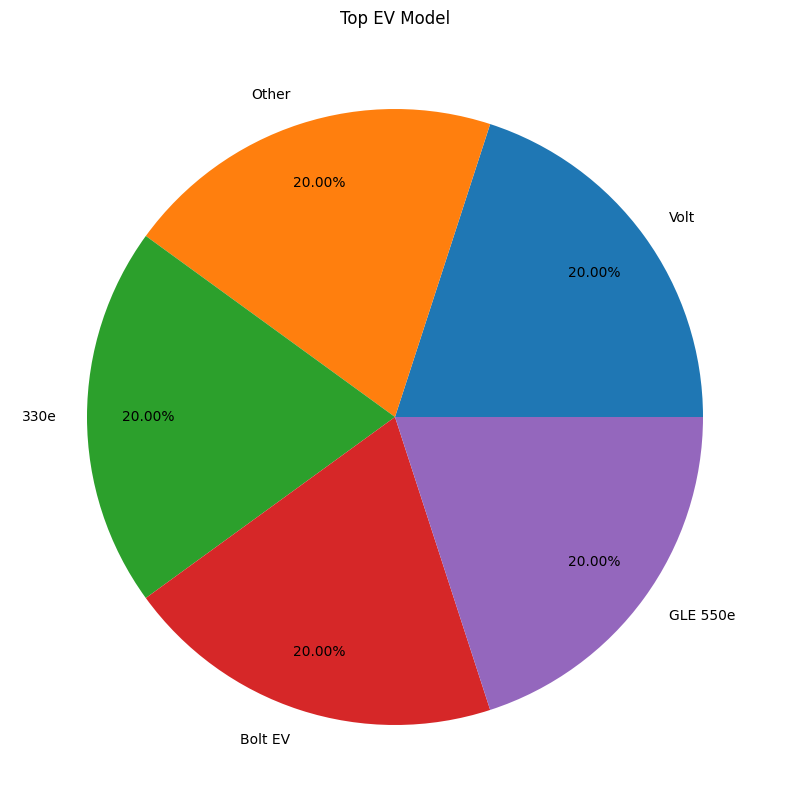

In [125]:
fig = plt.figure(figsize = (10,10))
ax = fig.subplots()
df.Model.value_counts().head(5).plot(ax=ax, kind='pie',autopct='%1.2f%%', pctdistance=0.8)
ax.set_ylabel("")
ax.set_title("Top EV Model")
plt.show()

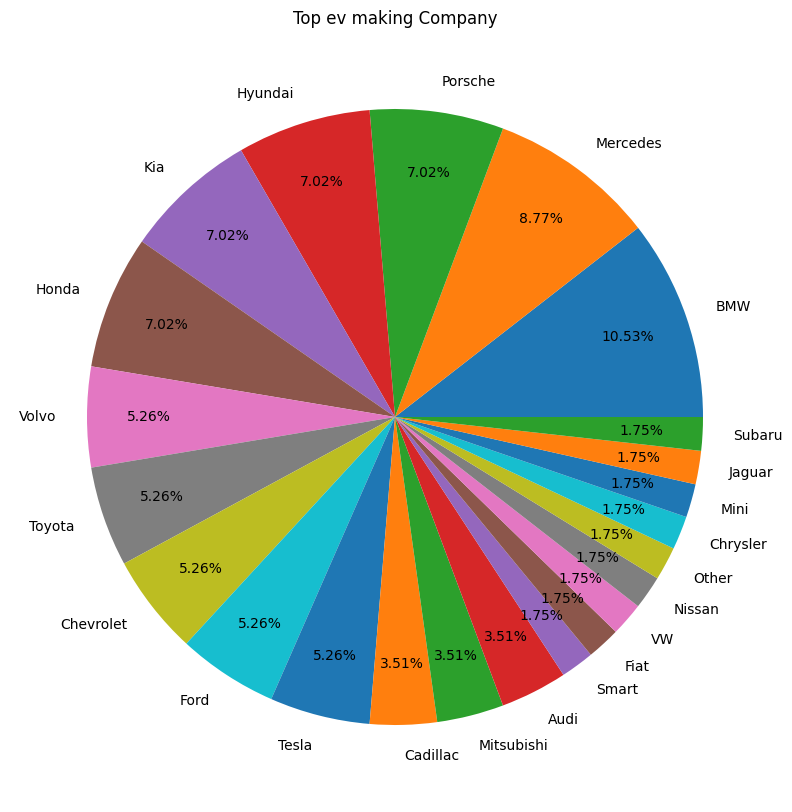

In [126]:
fig = plt.figure(figsize = (10,10))
ax = fig.subplots()
df.Make.value_counts().plot(ax=ax, kind='pie',autopct='%1.2f%%', pctdistance=0.8)
ax.set_ylabel("")
ax.set_title("Top ev making Company")
plt.show()

# Conclusion
BMW

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


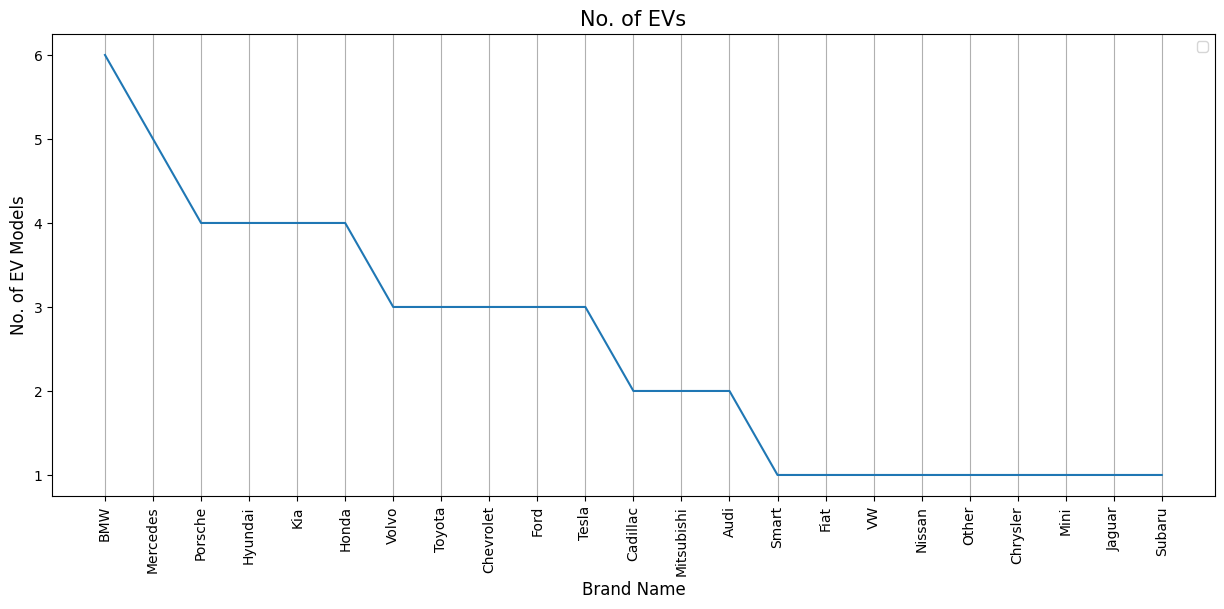

In [76]:
# Total number of models from respected brand
plt.figure(figsize=(15,6))
plt.xticks(rotation = 90)
plt.grid(axis="x")
plt.legend()
plt.xlabel("Brand Name",fontsize=12)
plt.ylabel("No. of EV Models",fontsize=12)
plt.title('No. of EVs',fontsize=15)
plt.plot(df['Make'].value_counts(), label='No. of Models')
plt.show()


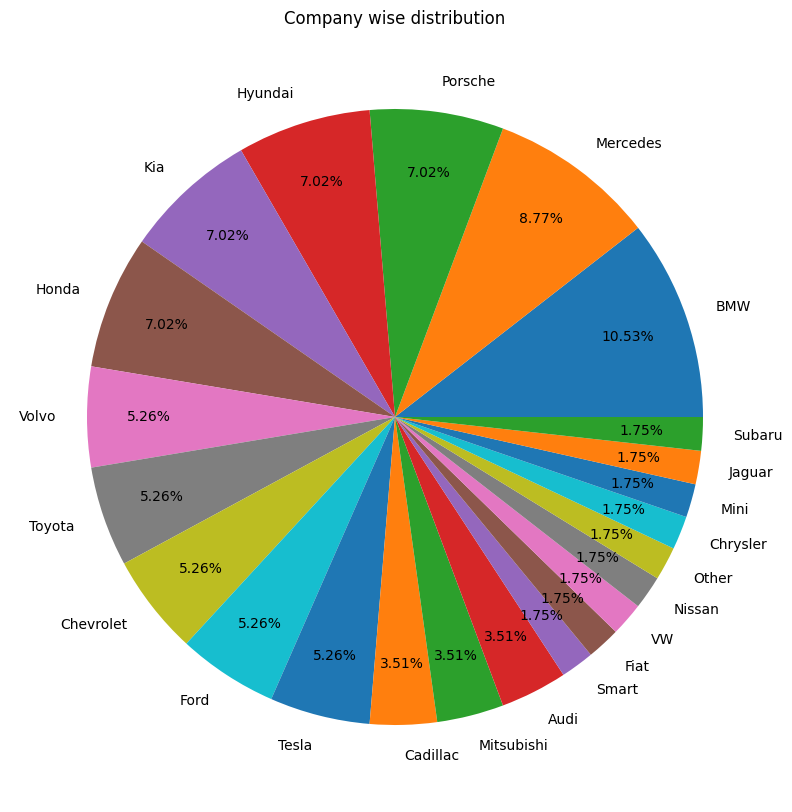

In [102]:
fig = plt.figure(figsize = (10,10))
ax = fig.subplots()
df.Make.value_counts().plot(ax=ax, kind='pie', autopct='%1.2f%%', pctdistance=0.8)
ax.set_ylabel("")
ax.set_title("Company wise distribution")

plt.show()


<Axes: ylabel='Frequency'>

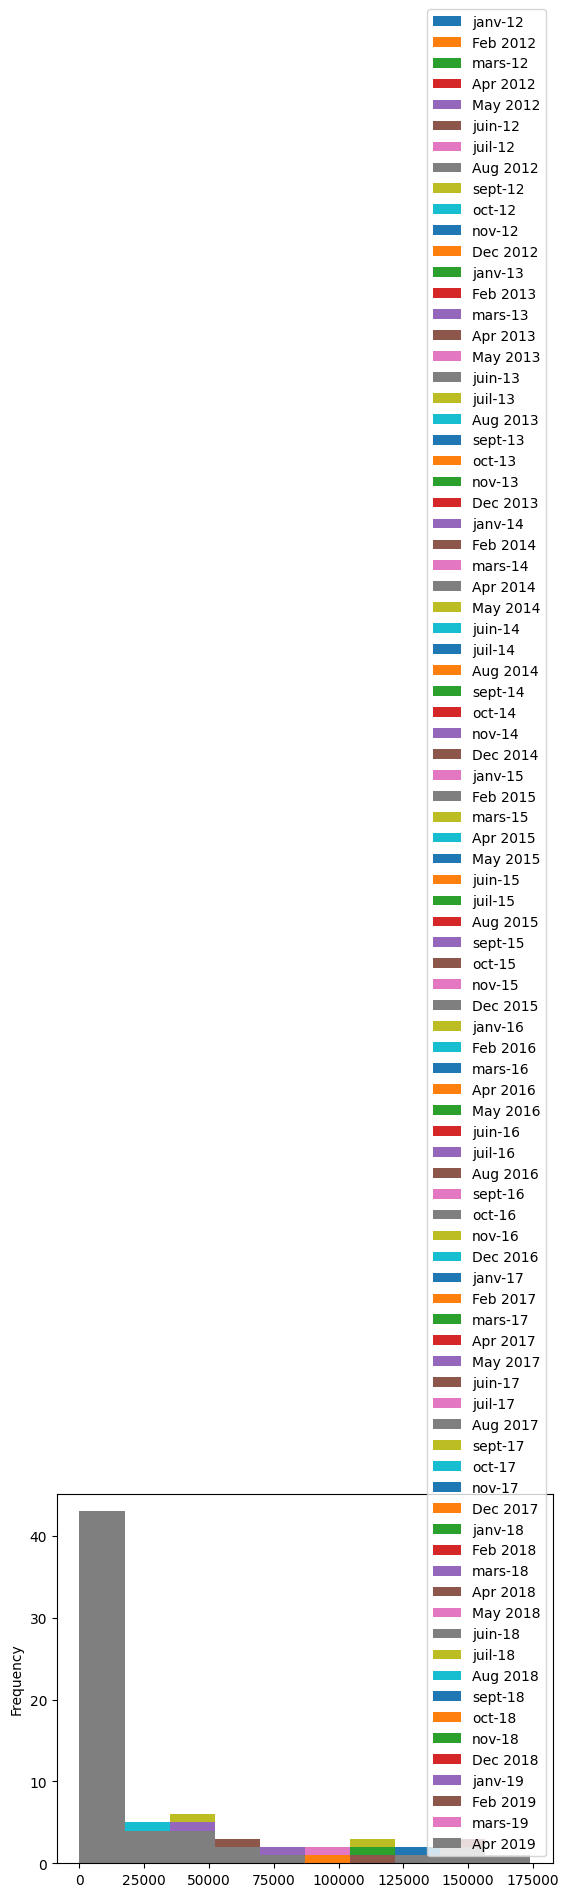

In [79]:
df.plot.hist()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, 'Chevrolet'),
  Text(1, 0, 'Toyota'),
  Text(2, 0, 'Nissan'),
  Text(3, 0, 'Tesla'),
  Text(4, 0, 'Ford'),
  Text(5, 0, 'Mitsubishi'),
  Text(6, 0, 'Honda'),
  Text(7, 0, 'Fiat'),
  Text(8, 0, 'Smart'),
  Text(9, 0, 'Porsche'),
  Text(10, 0, 'Cadillac'),
  Text(11, 0, 'BMW'),
  Text(12, 0, 'Mercedes'),
  Text(13, 0, 'Kia'),
  Text(14, 0, 'VW'),
  Text(15, 0, 'Hyundai'),
  Text(16, 0, 'Volvo'),
  Text(17, 0, 'Audi'),
  Text(18, 0, 'Other'),
  Text(19, 0, 'Chrysler'),
  Text(20, 0, 'Mini'),
  Text(21, 0, 'Jaguar'),
  Text(22, 0, 'Subaru')])

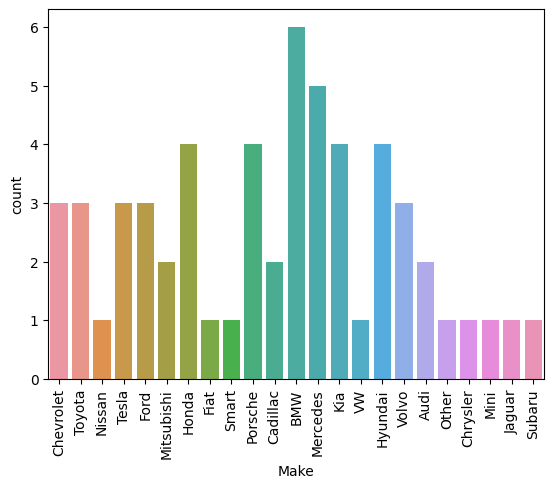

In [84]:
sns.countplot(x='Make',data=df)
plt.xticks(rotation='vertical')

In [94]:
df['Car_Name']=df['Make'].str.cat(df['Model'],sep=' ')

In [97]:
df.head()

Make         Model                                               Logo   
0  Chevrolet          Volt  https://www.carlogos.org/logo/Chevrolet-logo-2...  \
1     Toyota     Prius PHV  https://www.carlogos.org/logo/Toyota-logo-1989...   
2     Nissan          Leaf  https://www.carlogos.org/logo/Nissan-logo-2013...   
3      Tesla       Model S  https://www.carlogos.org/logo/Tesla-logo-2003-...   
4       Ford  C-Max Energi  https://www.carlogos.org/logo/Ford-logo-2003-1...   

   janv-12  Feb 2012  mars-12  Apr 2012  May 2012  juin-12  juil-12  ...   
0    603.0    1626.0   3915.0    5377.0    7057.0   8817.0  10666.0  ...  \
1      0.0      21.0    912.0    2566.0    3652.0   4347.0   5035.0  ...   
2    676.0    1154.0   1733.0    2103.0    2613.0   3148.0   3543.0  ...   
3      0.0       NaN      NaN       NaN       NaN     12.0     31.0  ...   
4      0.0       NaN      NaN       NaN       NaN      NaN      NaN  ...   

   Apr 2019  May 2019  juin-19  juil-19  Aug 2019  sept-19   oct-19   nov-19   
0  147072.0    147,48  147,813  148,063   148,337  148,687  148,757  148,907  \
1   42345.0     42345    42345    42345     42345    42345    42345    42345   
2  123485.0   124,701  125,857  126,795   127,912   128,96  129,847  130,987   
3  148342.0   149,367  151,117  152,092   153,142  154,242  154,992  156,492   
4   42231.0     42231    42231    42231     42231    42231    42231    42231   

   Dec 2019           Car_Name  
0   149,057     Chevrolet Volt  
1     42345   Toyota Prius PHV  
2   132,214        Nissan Leaf  
3   157,992      Tesla Model S  
4     42231  Ford C-Max Energi  

[5 rows x 100 columns]

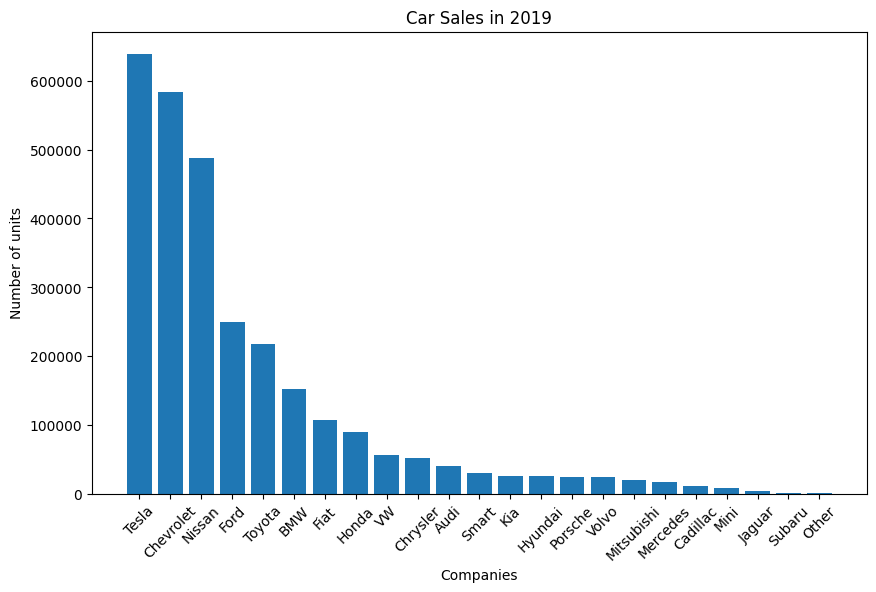

In [131]:
df_2019 = df[['Make', 'janv-19', 'Feb 2019', 'mars-19', 'Apr 2019', 'May 2019', 'juin-19', 'juil-19','Aug 2019', 'sept-19', 'oct-19', 'nov-19', 'Dec 2019']].copy()

df_2019['Total Sales'] = df_2019.iloc[:, 1:].sum(axis=1, numeric_only=True)

# Sort the data by total sales in descending order
df_2019_sorted = df_2019.sort_values('Total Sales', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_2019_sorted['Make'], df_2019_sorted['Total Sales'])

plt.xlabel('Companies')
plt.ylabel('Number of units')
plt.title('Car Sales in 2019')
plt.xticks(rotation=45)
plt.show()

# Conclusion
Tesla

In [135]:
df_2019

Model   janv-19  Feb 2019   mars-19  Apr 2019 May 2019   
0                 Volt  144822.0  145437.0  146667.0  147072.0   147,48  \
1            Prius PHV   42345.0   42345.0   42345.0   42345.0    42345   
2                 Leaf  120566.0  121220.0  122534.0  123485.0  124,701   
3              Model S  144617.0  145242.0  147517.0  148342.0  149,367   
4         C-Max Energi   42231.0   42231.0   42231.0   42231.0    42231   
5       Focus Electric    9242.0    9242.0    9242.0    9242.0     9242   
6               i-MiEV    2028.0    2028.0    2028.0    2028.0     2028   
7              Rav4 EV    2472.0    2472.0    2472.0    2472.0     2472   
8               Fit EV    1069.0    1069.0    1069.0    1069.0     1069   
9        Fusion Energi   61590.0   62163.0   62774.0   63359.0   63,964   
10                500e   26668.0   26755.0   26788.0   26808.0   26,868   
11                  ED    7407.0    7465.0    7555.0    7640.0    7,746   
12            Spark EV    7369.0    7369.0    7369.0    7369.0     7369   
13          Accord PHV    1039.0    1039.0    1039.0    1039.0     1039   
14   Panamera E-Hybrid    3969.0    4129.0    4324.0    4479.0    4,649   
15                 ELR    2891.0    2891.0    2891.0    2891.0     2891   
16                  i3   37389.0   37739.0   38098.0   38429.0   38,868   
17          B-Class ED    4192.0    4194.0    4194.0    4195.0     4195   
18                  i8    5697.0    5744.0    5835.0    5922.0    6,067   
19             Soul EV    6393.0    6394.0    6396.0    6396.0     6397   
20              e-Golf   13578.0   13696.0   14277.0   14677.0   14,941   
21         Cayenne S-E    5975.0    6070.0    6185.0    6255.0     6,36   
22        X5 xDrive40e   16741.0   16779.0   16805.0   16814.0   16,818   
23             Model X   66627.0   67527.0   69702.0   70752.0   72,127   
24          918 Spyder     203.0     203.0     203.0     203.0      203   
25         Sonata PHEV    6254.0    6325.0    6332.0    6378.0    6,418   
26               S550e    1438.0    1448.0    1470.0    1505.0    1,556   
27                XC90    5779.0    5884.0    6039.0    6139.0    6,259   
28    A3 Sprtbk e-tron    9978.0   10188.0   10233.0   10240.0    10240   
29               Other      35.0      35.0      35.0      35.0       35   
30         Prius Prime   52076.0   53281.0   55101.0   56500.0   58,414   
31                330e    7827.0    8012.0    8187.0    8240.0    8,267   
32             Bolt EV   42820.0   44045.0   46211.0   47121.0   48,517   
33            GLE 550e    1752.0    1847.0    1957.0    2107.0    2,292   
34               C350e    2849.0    2994.0    3129.0    3302.0    3,517   
35                740e    1075.0    1089.0    1104.0    1112.0    1,124   
36     Pacifica Hybrid   12095.0   12684.0   13067.0   13414.0   13,804   
37                530e   12812.0   13226.0   13662.0   14078.0   14,805   
38             Model 3  148046.0  153796.0  163971.0  174021.0  187,971   
39         Optima PHEV    2507.0    2518.0    2526.0    2531.0     2531   
40         Clarity BEV    2147.0    2215.0    2307.0    2395.0    2,477   
41        Clarity PHEV   20697.0   21910.0   23221.0   24202.0   25,018   
42           XC60 PHEV    2888.0    2988.0    3113.0    3198.0    3,293   
43  Countryman SE PHEV    2089.0    2152.0    2197.0    2234.0    2,319   
44            IONIQ EV     811.0     843.0     871.0     880.0      941   
45            CT6 PHEV     446.0     447.0     450.0     452.0      452   
46         S90 T8 PHEV     589.0     634.0     689.0     724.0      774   
47      Outlander PHEV    4398.0    4555.0    4896.0    5059.0    5,291   
48           Niro PHEV    3668.0    4173.0    4403.0    4648.0    4,977   
49            GLC 350e     641.0     713.0     888.0    1108.0    1,372   
50              I-Pace     603.0     789.0    1001.0    1238.0    1,466   
51          IONIQ PHEV    1663.0    1717.0    1811.0    1874.0    1,937   
52       Kona Electric       NaN      16.0

In [134]:
# Filter the dataset for the year 2019
df_2019 = df[['Model', 'janv-19', 'Feb 2019', 'mars-19', 'Apr 2019', 'May 2019', 'juin-19', 'juil-19',
              'Aug 2019', 'sept-19', 'oct-19', 'nov-19', 'Dec 2019']].copy()

# Calculate the total car sales for each car model
df_2019['Car Sales'] = df_2019.iloc[:, 1:].sum(axis=1, numeric_only=True)

# Find the car model with the highest and lowest sales
highest_sales_model = df_2019.loc[df_2019['Car Sales'].idxmax(), 'Model']
lowest_sales_model = df_2019.loc[df_2019['Car Sales'].idxmin(), 'Model']

# Print the car model with the highest and lowest sales
print("Car Model with Highest Sales:", highest_sales_model)
print("Car Model with Lowest Sales:", lowest_sales_model)

Car Model with Highest Sales: Model 3
Car Model with Lowest Sales: Taycan


#Car sales in 2019

Conclusion: 
Company with Highest sales is Tesla
Company with Lowest sales is Subaru

#Car Model sales in 2019

Conclusion: 
Car Model with Highest Sales is Model 3 from Tesla.
Car Model with Lowest Sales is Taycan from Porsche.

# Overall Conclusion:
Based on the analysis of various graphs and conclusions, the following key findings can be summarized:

1.	The overall EV sales have been increasing significantly, especially from FY 2020.
2.	China has the highest EV sales, followed by other countries like Japan and India.
3.	EV sales are increasing in India as well.
4.	Sales trends and predictions indicate a continuous increase in EV adoption in countries such as Belgium, Greece, China, USA, and India from 2010 to 2030.
5.	Among different types of EVs, EV cars have the highest growth, followed by EV vans, EV buses, and EV trucks.
6.	Battery electric vehicles (BEVs) have shown tremendous growth compared to plug-in hybrid electric vehicles (PHEVs).
7.	In the EV sector, EV sales have the highest numbers, followed by EV stocks, EV stock share, EV sales share, and EV charging points.
8.	There is an increasing demand for electricity due to the growing EV market.
9.	Tesla has the highest number of EV models sold, followed by Audi, Volkswagen, Skoda, Renault, Porsche, and Volvo.
10.	Tesla cars have the highest top speed, and the Roadster model has the longest range of over 900 km.
11.	The average EV car price ranges from $40,000 to $80,000, with some models costing over $160,000 and some as low as $30,000.
12.	In terms of plug types, Type 2 (CCS) has the highest share at 87%, followed by Type 2 at 9%, and Type 1 (CHAdeMO) has the lowest share at 1%.
13.	The top EV models in terms of sales are Volt, 330e, GLE 550e, and Bolt EV.
14.	The top EV-making companies include BMW, Tesla, Mercedes, Porsche, Hyundai, Kia, and Honda, among others.
15.	In terms of company-wise distribution, BMW has the highest market share at 10.53%, followed by Mercedes, Porsche, Hyundai, Kia, Honda, and Tesla.
16.	In the sales data for 2019, Tesla had the highest sales among all companies, while Subaru had the lowest.
17.	Among the car models, Model 3 from Tesla had the highest sales in 2019, while Taycan from Porsche had the lowest.
Overall, the analysis indicates a positive trend in EV sales globally, with countries like China, Japan, and India leading the way. Tesla emerges as a dominant player in the EV market, with popular models like Model 3 driving its sales. The future outlook for EV adoption and sales looks promising, with increasing investments in infrastructure and technology.